In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
Load the Dataset and Visualizing the Data

In [3]:
df = pd.read_csv("time3.csv", index_col=[0], parse_dates=True)
df

,Units Sold,Total Revenue
Order Date,,
2015-08-31,3604,2408445.08
2010-11-20,8435,2153286.80
2017-06-22,4848,2045322.72
2012-02-28,7225,3048155.25
2010-08-12,1975,406257.50
...,...,...
2010-11-16,39,363.87
2013-12-14,8856,1351248.48
2010-02-18,261,2435.13


<Axes: xlabel='Order Date'>

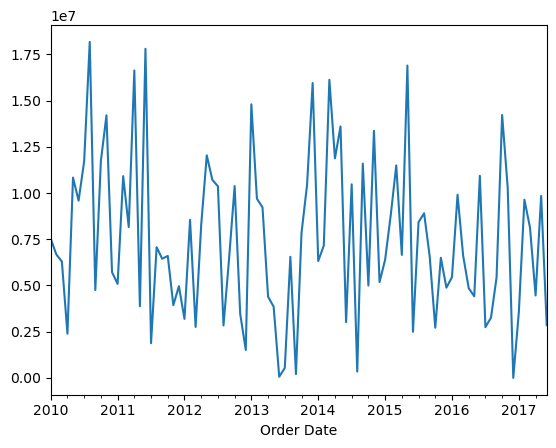

In [4]:
ts = df["Total Revenue"].resample("MS").sum()
ts.plot()

<function matplotlib.pyplot.show(close=None, block=None)>

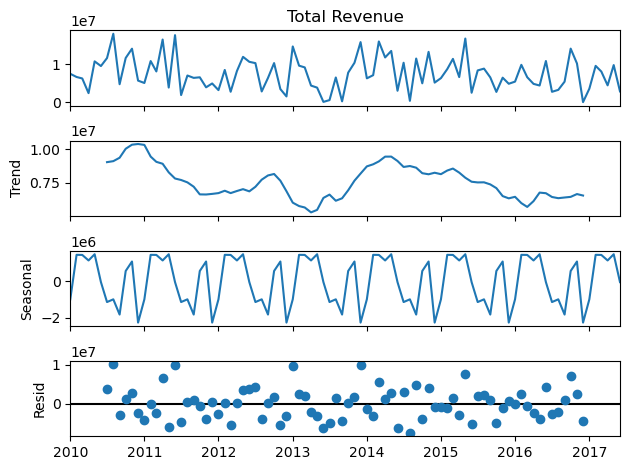

In [25]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(ts, model="additive")
fig = decomposition.plot()
plt.show

Finding the p,d, q for ARIMA and P,D,Q for SARIMAX

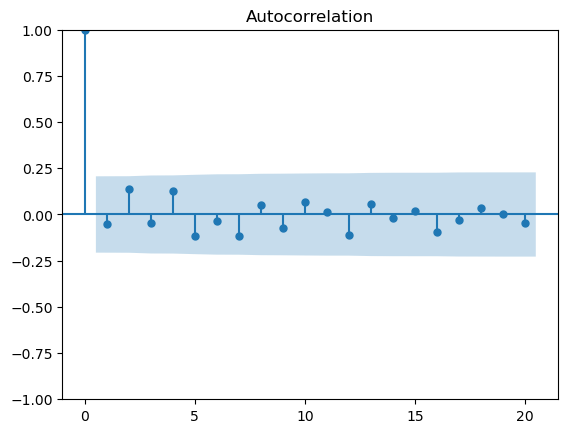

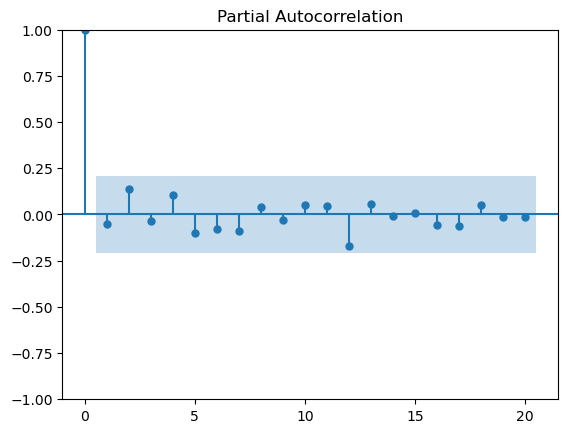

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(ts)
pacf = plot_pacf(ts)

In [7]:
import pmdarima as pm
auto_arima = pm.auto_arima(ts, stepwise=False, seasonal=False)
auto_arima 

ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [8]:
len(ts)

90

In [9]:
train=ts[:80]
test=ts[80:]

In [ ]:
Building the Model and Checking its Performance

In [30]:
import statsmodels.api as sm
model = sm.tsa.SARIMAX(train, order=(2,0,2), seasonal_order=(0,0,2,30)).fit()
model.summary()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                      Total Revenue   No. Observations:                   80
Model:             SARIMAX(2, 0, 2)x(0, 0, 2, 30)   Log Likelihood               -1338.121
Date:                            Wed, 20 Dec 2023   AIC                           2690.243
Time:                                    22:03:24   BIC                           2706.917
Sample:                                01-01-2010   HQIC                          2696.928
                                     - 08-01-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1110      0.242      0.460      0.646      -0.362       0.584
ar.L2          0.8877      0.241      3.681      0.000       0.415       1.360
ma.L1         -0.1472      0.305     -0.483      0.629      -0.745       0.450
ma.L2         -0.7636      0.303     -2.521      0.012      -1.357      -0.170
ma.S.L30       0.0935      0.166      0.562      0.574      -0.233       0.420
ma.S.L60       0.2029      0.355      0.572      0.567      -0.492       0.898
sigma2      2.064e+13   1.67e-14   1.23e+27      0.000    2.06e+13    2.06e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.70   Jarque-Bera (JB):                 3.92
Prob(Q):                              0.40   Prob(JB):                         0.14
Heteroskedasticity (H):               0.58   Skew:                             0.44
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.31e+43. Standard errors may be unstable.
"""

In [11]:
len(train),len(ts)-1

(80, 89)

In [16]:
pred = model.predict(start=len(train), end=(len(ts)-1), dynamic=True)
pred


2016-09-01    7.413685e+06
2016-10-01    6.855633e+06
2016-11-01    6.701629e+06
2016-12-01    5.792897e+06
2017-01-01    6.266331e+06
2017-02-01    6.227173e+06
2017-03-01    6.262800e+06
2017-04-01    6.587398e+06
2017-05-01    8.106764e+06
2017-06-01    7.054854e+06
Freq: MS, Name: predicted_mean, dtype: float64

In [17]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(pred, test))

15204030522770.615


<Axes: xlabel='Order Date'>

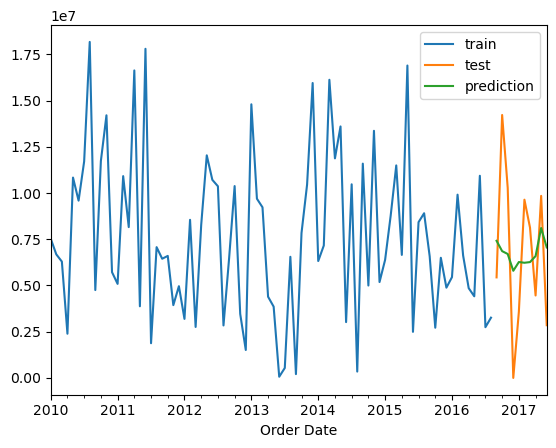

In [18]:
train.plot(legend=True, label="train")
test.plot(legend=True, label="test")
pred.plot(legend=True, label="prediction")

Forecasting Total Revenue for the next 10 months 

In [20]:
pred1 = model.predict(len(ts), len(ts)+10)
pred1

2017-07-01    7.195331e+06
2017-08-01    5.977626e+06
2017-09-01    6.976528e+06
2017-10-01    7.352160e+06
2017-11-01    6.743515e+06
2017-12-01    5.021551e+06
2018-01-01    8.020116e+06
2018-02-01    6.827147e+06
2018-03-01    7.058997e+06
2018-04-01    5.492990e+06
2018-05-01    5.674449e+06
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: xlabel='Order Date'>

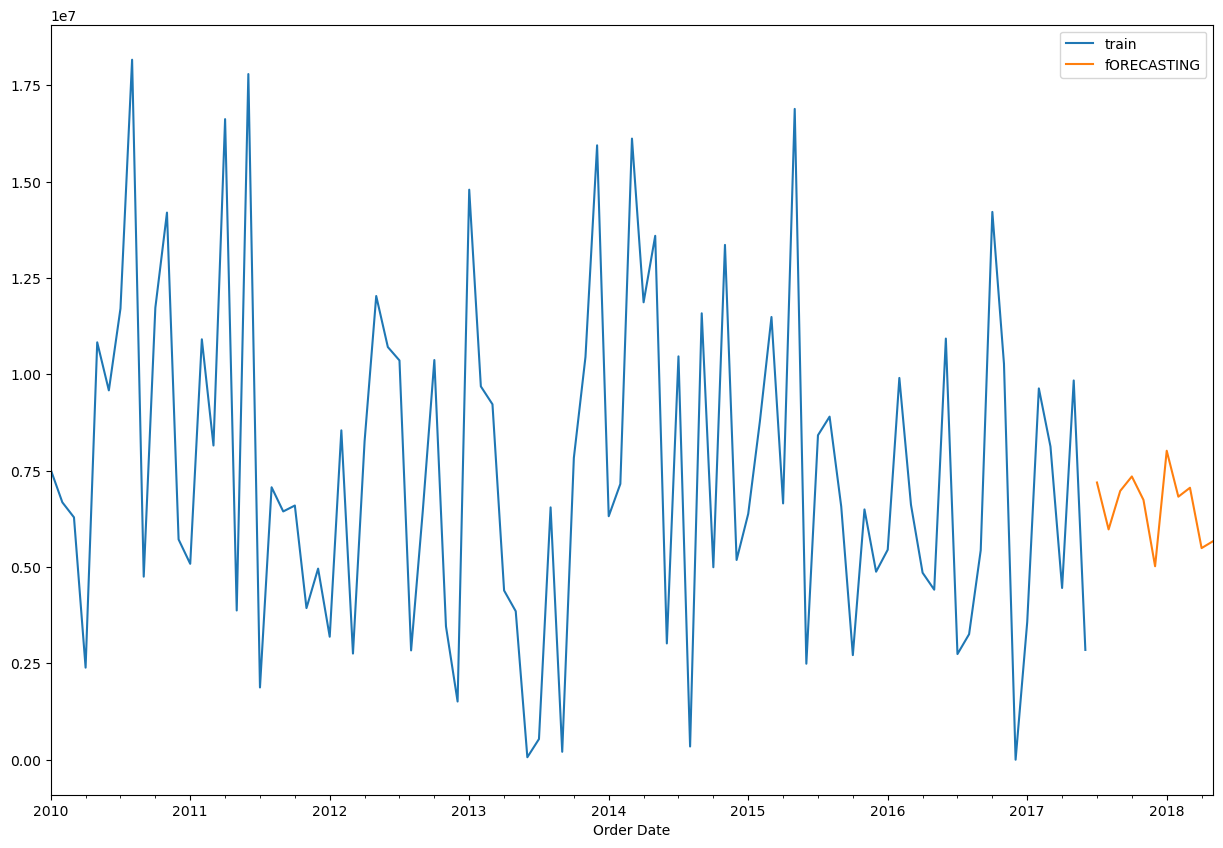

In [23]:
ts.plot(legend=True, label="train", figsize=(15,10))
pred1.plot(legend=True, label="fORECASTING")

In [24]:
pred1

2017-07-01    7.195331e+06
2017-08-01    5.977626e+06
2017-09-01    6.976528e+06
2017-10-01    7.352160e+06
2017-11-01    6.743515e+06
2017-12-01    5.021551e+06
2018-01-01    8.020116e+06
2018-02-01    6.827147e+06
2018-03-01    7.058997e+06
2018-04-01    5.492990e+06
2018-05-01    5.674449e+06
Freq: MS, Name: predicted_mean, dtype: float64